In [151]:
import pandas as pd
import plotly.express as px  # pip install plotly-express


In [152]:
def load_database(path):
    dataFrame = pd.read_csv(path, on_bad_lines="skip", index_col=0)
    for (columnName,columnDataType) in zip(dataFrame.columns,dataFrame.dtypes):
        if columnDataType == "float64":
            dataFrame[columnName] = dataFrame[columnName].astype('Int64')
        if columnName[-4:] == "time":
            dataFrame[columnName] = pd.to_datetime(dataFrame[columnName], infer_datetime_format=True)
    return dataFrame


In [153]:
users_info_df = load_database("pages/Database/users_info.csv")

institutions_df = load_database("pages/Database/institutions.csv" )


#a = users_info_df.groupby(users_info_df.create_time.dt.year).count()["user_id"]
a = users_info_df.groupby(users_info_df.create_time.dt.year).agg({"user_id": "count"})

In [162]:
for i in users_info_df.groupby(users_info_df.create_time.dt.year):
    print(i)

(1970,       create_time  institution_id  user_id  is_admin  active  status
0      1970-01-01              15     4591         1       1       1
1      1970-01-01              23       29         1       1       1
2      1970-01-01              16     5041         1       1       1
3      1970-01-01               7     5057         1       1       1
4      1970-01-01               8     5184         1       1       1
...           ...             ...      ...       ...     ...     ...
18420  1970-01-01             119    35893         0       1       1
18421  1970-01-01              48    96438         1       1       1
18422  1970-01-01             782   209339         0       1       1
18423  1970-01-01              15   109409         0       1       1
18424  1970-01-01             874   270545         0       1       1

[18425 rows x 6 columns])
(2016,       create_time  institution_id  user_id  is_admin  active  status
18425  2016-02-12              23     9980         0       0  

In [155]:
a

,user_id
create_time,
2016,22931
2017,29356
2018,14794
2019,23359
2020,29492
2021,57167
2022,54837
2023,7146


In [156]:
fig = px.bar(
    data_frame=a,
    x=a.index,
    y=a.user_id,
    #color="user_id",
    barmode="group",
)

fig.show()

<AxesSubplot: title={'center': 'Arrests'}, xlabel='Home Team', ylabel='Mean Arrests'>

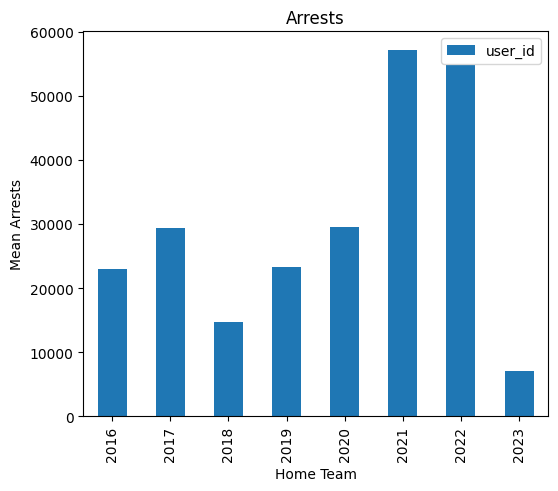

In [157]:
a.plot(kind='bar', title='Arrests', ylabel='Mean Arrests',
         xlabel='Home Team', figsize=(6, 5))
